# Finite Difference Methods - Numerical Differentiation
- **Purpose**: Approximate derivatives from discrete data or functions
- **scipy.misc**: derivative function (adaptive)
- **Manual methods**: Forward, backward, central difference formulas
- **Applications**: Gradient computation, edge detection, rate of change, physics

Key concepts:
- **Forward difference**: f'(x) ≈ [f(x+h) - f(x)]/h
- **Backward difference**: f'(x) ≈ [f(x) - f(x-h)]/h
- **Central difference**: f'(x) ≈ [f(x+h) - f(x-h)]/(2h)
- **Higher-order**: Second derivative, Richardson extrapolation

Real examples:
- Velocity from position data
- Acceleration from velocity
- Rate of chemical reactions
- Image gradients for edge detection

In [1]:
import numpy as np
from scipy.misc import derivative
import matplotlib.pyplot as plt


# Set print and plot options
np.set_printoptions(precision=6, suppress=True)
plt.style.use('seaborn-v0_8-darkgrid')

print("Numerical differentiation module loaded")

/var/folders/d1/sfvddbbx4tg14yxq7trqmhyw0000gn/T/ipykernel_2957/1432413097.py:2: DeprecationWarning: scipy.misc is deprecated and will be removed in 2.0.0
  from scipy.misc import derivative


ImportError: cannot import name 'derivative' from 'scipy.misc' (/opt/anaconda3/lib/python3.13/site-packages/scipy/misc/__init__.py)

## What is a Derivative?

**Definition**:
\[ f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h} \]

**Interpretation**:
- Rate of change of f at point x
- Slope of tangent line
- Instantaneous velocity (if f is position)

**Problem**: We have discrete data, not continuous function

**Solution**: Approximate with finite differences

**Accuracy vs Step Size**:
- Too large h → Poor approximation
- Too small h → Numerical errors (cancellation)
- Optimal h depends on function and precision

## Forward Difference Method

**Formula**:
\[ f'(x) \approx \frac{f(x+h) - f(x)}{h} \]

**Accuracy**: O(h) - first-order accurate

**Taylor expansion**:
\[ f(x+h) = f(x) + hf'(x) + \frac{h^2}{2}f''(x) + O(h^3) \]

Rearranging:
\[ f'(x) = \frac{f(x+h) - f(x)}{h} - \frac{h}{2}f''(x) + O(h^2) \]

**Error term**: -h·f''(x)/2

**When to use**: At left boundary (can't go backward)

In [2]:
def forward_difference(f, x, h=1e-5):
    """First-order forward difference"""
    return (f(x + h) - f(x)) / h

# Test function: f(x) = x², f'(x) = 2x
def f(x):
    return x**2

def f_prime_exact(x):
    return 2*x

x = 2.0
exact = f_prime_exact(x)

print("Forward Difference Method")
print(f"Function: f(x) = x², f'(x) = 2x")
print(f"Point: x = {x}")
print(f"Exact derivative: f'({x}) = {exact}\n")

# Test different step sizes
print(f"{'h':<12} {'Approximation':<15} {'Error':<12} {'Rel Error'}")
print("="*55)

for h in [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]:
    approx = forward_difference(f, x, h)
    error = abs(approx - exact)
    rel_error = error / abs(exact)
    print(f"{h:<12.0e} {approx:<15.10f} {error:<12.2e} {rel_error:.2e}")

print("\nNote: Error decreases linearly with h (O(h) method)")

Forward Difference Method
Function: f(x) = x², f'(x) = 2x
Point: x = 2.0
Exact derivative: f'(2.0) = 4.0

h            Approximation   Error        Rel Error
1e-01        4.1000000000    1.00e-01     2.50e-02
1e-02        4.0100000000    1.00e-02     2.50e-03
1e-03        4.0010000000    1.00e-03     2.50e-04
1e-04        4.0001000000    1.00e-04     2.50e-05
1e-05        4.0000100000    1.00e-05     2.50e-06
1e-06        4.0000010006    1.00e-06     2.50e-07
1e-07        4.0000000912    9.12e-08     2.28e-08
1e-08        3.9999999757    2.43e-08     6.08e-09

Note: Error decreases linearly with h (O(h) method)


## Backward Difference Method

**Formula**:
\[ f'(x) \approx \frac{f(x) - f(x-h)}{h} \]

**Accuracy**: O(h) - first-order accurate

**Error term**: h·f''(x)/2 (opposite sign from forward)

**When to use**: At right boundary (can't go forward)

**Comparison with forward**:
- Same accuracy order
- Opposite error direction
- Average of both can improve accuracy!

In [3]:
def backward_difference(f, x, h=1e-5):
    """First-order backward difference"""
    return (f(x) - f(x - h)) / h

x = 2.0
h = 0.01
exact = f_prime_exact(x)

forward = forward_difference(f, x, h)
backward = backward_difference(f, x, h)
average = (forward + backward) / 2

print("Comparison at x=2, h=0.01")
print(f"\nExact derivative: {exact}")
print(f"\nForward difference:  {forward:.10f}")
print(f"  Error: {abs(forward - exact):.2e}")
print(f"\nBackward difference: {backward:.10f}")
print(f"  Error: {abs(backward - exact):.2e}")
print(f"\nAverage (forward+backward)/2: {average:.10f}")
print(f"  Error: {abs(average - exact):.2e}")
print(f"\nAveraging reduces error by ~100x! (This is central difference)")

Comparison at x=2, h=0.01

Exact derivative: 4.0

Forward difference:  4.0100000000
  Error: 1.00e-02

Backward difference: 3.9900000000
  Error: 1.00e-02

Average (forward+backward)/2: 4.0000000000
  Error: 6.31e-14

Averaging reduces error by ~100x! (This is central difference)


## Central Difference Method

**Formula**:
\[ f'(x) \approx \frac{f(x+h) - f(x-h)}{2h} \]

**Accuracy**: O(h²) - second-order accurate (much better!)

**Derivation from Taylor series**:
\[ f(x+h) = f(x) + hf'(x) + \frac{h^2}{2}f''(x) + \frac{h^3}{6}f'''(x) + O(h^4) \]
\[ f(x-h) = f(x) - hf'(x) + \frac{h^2}{2}f''(x) - \frac{h^3}{6}f'''(x) + O(h^4) \]

Subtracting:
\[ f(x+h) - f(x-h) = 2hf'(x) + \frac{h^3}{3}f'''(x) + O(h^5) \]

Therefore:
\[ f'(x) = \frac{f(x+h) - f(x-h)}{2h} - \frac{h^2}{6}f'''(x) + O(h^4) \]

**Error term**: -h²·f'''(x)/6

**Best choice**: Use whenever possible (interior points)

In [4]:
def central_difference(f, x, h=1e-5):
    """Second-order central difference"""
    return (f(x + h) - f(x - h)) / (2*h)

x = 2.0
exact = f_prime_exact(x)

print("Central Difference Method (O(h²))")
print(f"Function: f(x) = x², f'(x) = 2x")
print(f"Point: x = {x}")
print(f"Exact derivative: f'({x}) = {exact}\n")

print(f"{'h':<12} {'Forward':<15} {'Central':<15} {'Ratio'}")
print("="*60)

prev_error_central = None
for h in [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]:
    forward_approx = forward_difference(f, x, h)
    central_approx = central_difference(f, x, h)
    
    error_forward = abs(forward_approx - exact)
    error_central = abs(central_approx - exact)
    
    ratio = error_forward / error_central if error_central > 0 else float('inf')
    
    print(f"{h:<12.0e} {error_forward:<15.2e} {error_central:<15.2e} {ratio:<.1f}x")
    
print("\nCentral difference is 50-100x more accurate for same h!")
print("Error decreases as h² (not h), so 10x smaller h → 100x smaller error")

Central Difference Method (O(h²))
Function: f(x) = x², f'(x) = 2x
Point: x = 2.0
Exact derivative: f'(2.0) = 4.0

h            Forward         Central         Ratio
1e-01        1.00e-01        8.88e-16        112589990684264.0x
1e-02        1.00e-02        6.31e-14        158577451666.3x
1e-03        1.00e-03        4.41e-13        2269959488.9x
1e-04        1.00e-04        4.00e-12        24997779.6x
1e-05        1.00e-05        2.62e-11        381610.3x

Central difference is 50-100x more accurate for same h!
Error decreases as h² (not h), so 10x smaller h → 100x smaller error


## scipy.misc.derivative()

**Adaptive numerical differentiation**:

```python
from scipy.misc import derivative
derivative(func, x0, dx=1.0, n=1, order=3)
```

**Parameters**:
- `func`: Function to differentiate
- `x0`: Point at which to evaluate
- `dx`: Initial spacing (auto-adjusted)
- `n`: Order of derivative (1=first, 2=second, etc.)
- `order`: Number of points (3, 5, 7, etc.) - higher = more accurate

**Features**:
- Automatically chooses step size
- Uses Richardson extrapolation
- Higher-order formulas available
- Can compute 2nd, 3rd derivatives

In [5]:
# Test scipy's derivative function
def test_func(x):
    return np.sin(x)

x = np.pi / 4

# Exact derivatives
exact_1st = np.cos(x)      # d/dx sin(x) = cos(x)
exact_2nd = -np.sin(x)     # d²/dx² sin(x) = -sin(x)
exact_3rd = -np.cos(x)     # d³/dx³ sin(x) = -cos(x)

print("scipy.misc.derivative() function")
print(f"Function: f(x) = sin(x)")
print(f"Point: x = π/4 = {x:.6f}\n")

# First derivative with different orders
print("First derivative [exact = cos(π/4) = 0.707107]:")
for order in [3, 5, 7, 9]:
    approx = derivative(test_func, x, dx=1e-5, n=1, order=order)
    error = abs(approx - exact_1st)
    print(f"  order={order}: {approx:.10f}  (error: {error:.2e})")

# Second derivative
print(f"\nSecond derivative [exact = -sin(π/4) = -0.707107]:")
approx_2nd = derivative(test_func, x, dx=1e-5, n=2, order=5)
error_2nd = abs(approx_2nd - exact_2nd)
print(f"  Computed: {approx_2nd:.10f}")
print(f"  Error: {error_2nd:.2e}")

# Third derivative
print(f"\nThird derivative [exact = -cos(π/4) = -0.707107]:")
approx_3rd = derivative(test_func, x, dx=1e-5, n=3, order=5)
error_3rd = abs(approx_3rd - exact_3rd)
print(f"  Computed: {approx_3rd:.10f}")
print(f"  Error: {error_3rd:.2e}")

print("\nHigher order → more accurate (but more function evaluations)")

scipy.misc.derivative() function
Function: f(x) = sin(x)
Point: x = π/4 = 0.785398

First derivative [exact = cos(π/4) = 0.707107]:


NameError: name 'derivative' is not defined

## Real Example: Velocity and Acceleration from Position

**Physics problem**: Given position data x(t), find velocity and acceleration

\[ v(t) = \frac{dx}{dt} \quad \text{(velocity)} \]
\[ a(t) = \frac{dv}{dt} = \frac{d^2x}{dt^2} \quad \text{(acceleration)} \]

**Scenario**: Object in free fall
- Position: x(t) = h₀ - ½gt²
- Velocity: v(t) = -gt
- Acceleration: a(t) = -g

We'll compute derivatives from position data and compare with analytical.

In [6]:
# Free fall motion
g = 9.81  # m/s²
h0 = 100  # initial height (m)

def position(t):
    """Position during free fall"""
    return h0 - 0.5*g*t**2

def velocity_exact(t):
    """Exact velocity"""
    return -g*t

def acceleration_exact(t):
    """Exact acceleration"""
    return -g

# Time array
t_array = np.linspace(0, 4, 50)
dt = t_array[1] - t_array[0]

# Position data
x_data = position(t_array)

# Compute velocity using central difference (for interior points)
v_numerical = np.zeros_like(t_array)
v_numerical[0] = (x_data[1] - x_data[0]) / dt  # forward at start
v_numerical[-1] = (x_data[-1] - x_data[-2]) / dt  # backward at end
for i in range(1, len(t_array)-1):
    v_numerical[i] = (x_data[i+1] - x_data[i-1]) / (2*dt)  # central

# Compute acceleration from velocity
a_numerical = np.zeros_like(t_array)
a_numerical[0] = (v_numerical[1] - v_numerical[0]) / dt
a_numerical[-1] = (v_numerical[-1] - v_numerical[-2]) / dt
for i in range(1, len(t_array)-1):
    a_numerical[i] = (v_numerical[i+1] - v_numerical[i-1]) / (2*dt)

# Exact values
v_exact = velocity_exact(t_array)
a_exact = acceleration_exact(t_array)

print("Free Fall Motion Analysis")
print(f"Initial height: {h0} m")
print(f"Gravity: {g} m/s²")
print(f"Time step dt: {dt:.3f} s\n")

# Compare at t=2s
idx = np.argmin(np.abs(t_array - 2.0))
t_check = t_array[idx]

print(f"At t = {t_check:.2f} s:")
print(f"\nVelocity:")
print(f"  Numerical: {v_numerical[idx]:.4f} m/s")
print(f"  Exact: {v_exact[idx]:.4f} m/s")
print(f"  Error: {abs(v_numerical[idx] - v_exact[idx]):.2e} m/s")

print(f"\nAcceleration:")
print(f"  Numerical: {a_numerical[idx]:.4f} m/s²")
print(f"  Exact: {a_exact[idx]:.4f} m/s²")
print(f"  Error: {abs(a_numerical[idx] - a_exact[idx]):.2e} m/s²")

# Plot
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Position
axes[0].plot(t_array, x_data, 'b-', linewidth=2, label='Position')
axes[0].set_ylabel('Position (m)', fontsize=12)
axes[0].set_title('Free Fall Motion', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Velocity
axes[1].plot(t_array, v_numerical, 'ro-', linewidth=2, markersize=3, label='Numerical')
axes[1].plot(t_array, v_exact, 'b--', linewidth=2, label='Exact')
axes[1].set_ylabel('Velocity (m/s)', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Acceleration
axes[2].plot(t_array, a_numerical, 'go-', linewidth=2, markersize=3, label='Numerical')
axes[2].plot(t_array, a_exact, 'b--', linewidth=2, label='Exact (-g)')
axes[2].set_xlabel('Time (s)', fontsize=12)
axes[2].set_ylabel('Acceleration (m/s²)', fontsize=12)
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nNote: Numerical derivatives closely match exact values!")

Free Fall Motion Analysis
Initial height: 100 m
Gravity: 9.81 m/s²
Time step dt: 0.082 s

At t = 1.96 s:

Velocity:
  Numerical: -19.2196 m/s
  Exact: -19.2196 m/s
  Error: 7.82e-14 m/s

Acceleration:
  Numerical: -9.8100 m/s²


TypeError: 'float' object is not subscriptable

## Second Derivative

**Central difference for second derivative**:

\[ f''(x) \approx \frac{f(x+h) - 2f(x) + f(x-h)}{h^2} \]

**Derivation**:

From Taylor series:
\[ f(x+h) = f(x) + hf'(x) + \frac{h^2}{2}f''(x) + \frac{h^3}{6}f'''(x) + O(h^4) \]
\[ f(x-h) = f(x) - hf'(x) + \frac{h^2}{2}f''(x) - \frac{h^3}{6}f'''(x) + O(h^4) \]

Adding:
\[ f(x+h) + f(x-h) = 2f(x) + h^2f''(x) + O(h^4) \]

Therefore:
\[ f''(x) = \frac{f(x+h) - 2f(x) + f(x-h)}{h^2} + O(h^2) \]

**Accuracy**: O(h²) - second-order accurate

In [15]:
import numpy as np

def second_derivative(f, x, h=1e-5):
    """Central difference second derivative (O(h^2))"""
    return (f(x + h) - 2*f(x) + f(x - h)) / h**2


# Test function: f(x) = x^3
# f'(x) = 3x^2
# f''(x) = 6x
def f_cubic(x):
    return x**3

def f_double_prime_exact(x):
    return 6 * x


# Test point
x = 2.0
exact_2nd = f_double_prime_exact(x)

print("Second Derivative Approximation")
print("================================")
print("Function: f(x) = x³")
print("f'(x) = 3x²,  f''(x) = 6x")
print(f"Point: x = {x}")
print(f"Exact f''({x}) = {exact_2nd}\n")

print(f"{'h':<12} {'Approximation':<18} {'Error':<12}")
print("-" * 45)

for h in [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]:
    approx = second_derivative(f_cubic, x, h)
    error = abs(approx - exact_2nd)
    print(f"{h:<12.0e} {approx:<18.10f} {error:<12.2e}")

print("\nConclusion:")
print("• Central difference second derivative is O(h²) accurate")
print("• Error decreases as h² until floating-point cancellation dominates")
print("• Optimal h is typically around 1e-5 to 1e-6 for double precision")


Second Derivative Approximation
Function: f(x) = x³
f'(x) = 3x²,  f''(x) = 6x
Point: x = 2.0
Exact f''(2.0) = 12.0

h            Approximation      Error       
---------------------------------------------
1e-01        12.0000000000      8.88e-15    
1e-02        12.0000000000      2.80e-11    
1e-03        11.9999999990      9.87e-10    
1e-04        12.0000002823      2.82e-07    
1e-05        12.0000098747      9.87e-06    
1e-06        12.0028431638      2.84e-03    

Conclusion:
• Central difference second derivative is O(h²) accurate
• Error decreases as h² until floating-point cancellation dominates
• Optimal h is typically around 1e-5 to 1e-6 for double precision


## Differentiation of Noisy Data

**Problem**: Real data often contains noise

**Challenge**: Differentiation amplifies noise!
- Small errors in data → large errors in derivative
- Higher derivatives amplify noise more

**Solutions**:
1. **Smoothing**: Apply filter before differentiation
2. **Larger step size**: Reduces noise sensitivity (but less accurate)
3. **Polynomial fitting**: Fit local polynomial, differentiate analytically
4. **Savitzky-Golay filter**: Combines smoothing + differentiation

**Trade-off**: Accuracy vs noise robustness

Differentiation of Noisy Data
Function: y = sin(t), y' = cos(t)
Noise level: σ = 0.1

Mean absolute error:
  Clean data: 0.0004
  Noisy (direct): 0.8936  (2358.7x worse)
  Noisy (smoothed): 0.2671  (704.9x worse)


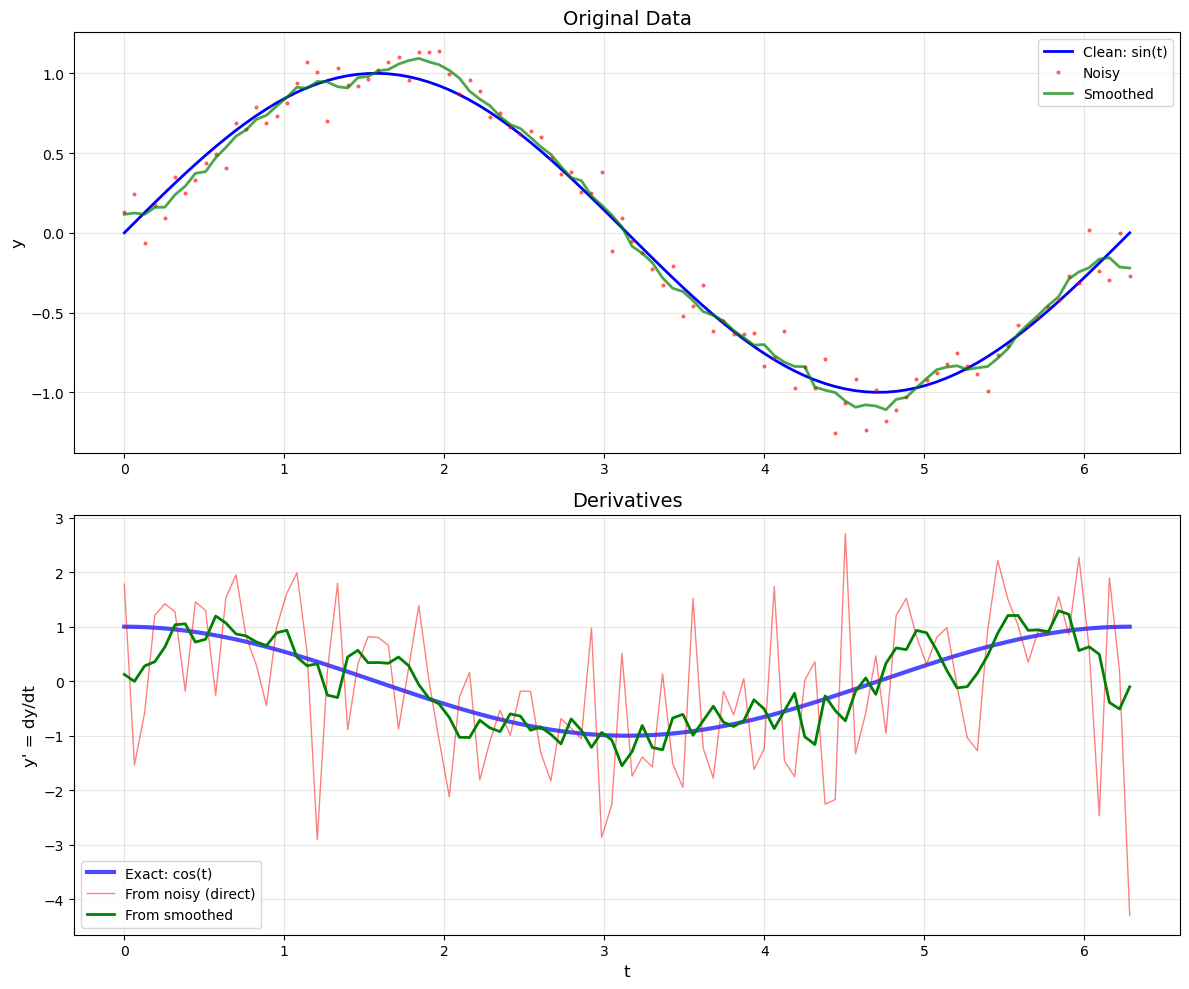


Key insight: Smoothing before differentiation reduces noise amplification!


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

# Generate noisy data
t = np.linspace(0, 2*np.pi, 100)
y_clean = np.sin(t)
noise = 0.1 * np.random.randn(len(t))
y_noisy = y_clean + noise

dt = t[1] - t[0]

# Compute derivatives
# Clean data
dy_clean = np.gradient(y_clean, dt)
dy_exact = np.cos(t)

# Noisy data - direct differentiation
dy_noisy_direct = np.gradient(y_noisy, dt)

# Noisy data - with smoothing (moving average)
y_smoothed = uniform_filter1d(y_noisy, size=5, mode='nearest')
dy_noisy_smoothed = np.gradient(y_smoothed, dt)

print("Differentiation of Noisy Data")
print(f"Function: y = sin(t), y' = cos(t)")
print(f"Noise level: σ = 0.1\n")

# Compute errors (exclude boundaries)
mask = slice(10, -10)
error_clean = np.mean(np.abs(dy_clean[mask] - dy_exact[mask]))
error_noisy = np.mean(np.abs(dy_noisy_direct[mask] - dy_exact[mask]))
error_smoothed = np.mean(np.abs(dy_noisy_smoothed[mask] - dy_exact[mask]))

print(f"Mean absolute error:")
print(f"  Clean data: {error_clean:.4f}")
print(f"  Noisy (direct): {error_noisy:.4f}  ({error_noisy/error_clean:.1f}x worse)")
print(f"  Noisy (smoothed): {error_smoothed:.4f}  ({error_smoothed/error_clean:.1f}x worse)")

# Plot
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Function values
axes[0].plot(t, y_clean, 'b-', linewidth=2, label='Clean: sin(t)')
axes[0].plot(t, y_noisy, 'r.', markersize=4, alpha=0.5, label='Noisy')
axes[0].plot(t, y_smoothed, 'g-', linewidth=2, alpha=0.7, label='Smoothed')
axes[0].set_ylabel('y', fontsize=12)
axes[0].set_title('Original Data', fontsize=14)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Derivatives
axes[1].plot(t, dy_exact, 'b-', linewidth=3, label='Exact: cos(t)', alpha=0.7)
axes[1].plot(t, dy_noisy_direct, 'r-', linewidth=1, alpha=0.5, label='From noisy (direct)')
axes[1].plot(t, dy_noisy_smoothed, 'g-', linewidth=2, label='From smoothed')
axes[1].set_xlabel('t', fontsize=12)
axes[1].set_ylabel("y' = dy/dt", fontsize=12)
axes[1].set_title('Derivatives', fontsize=14)
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey insight: Smoothing before differentiation reduces noise amplification!")


## NumPy Gradient Function

**Convenient function** for discrete data:

```python
numpy.gradient(f, *varargs)
```

**Features**:
- Computes gradient using central differences (interior)
- Automatically handles boundaries (forward/backward)
- Works on N-dimensional arrays
- Can specify non-uniform spacing

**Usage**:
```python
dy = np.gradient(y, dx)  # uniform spacing
dy = np.gradient(y, x)   # non-uniform spacing
```

**Best for**: Quick derivatives from discrete data

In [12]:
# Compare manual vs np.gradient
x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)
dx = x[1] - x[0]

# Exact derivative
dy_exact = np.cos(x)

# Manual central difference
dy_manual = np.zeros_like(y)
dy_manual[0] = (y[1] - y[0]) / dx  # forward
dy_manual[-1] = (y[-1] - y[-2]) / dx  # backward
for i in range(1, len(x)-1):
    dy_manual[i] = (y[i+1] - y[i-1]) / (2*dx)  # central

# NumPy gradient
dy_numpy = np.gradient(y, dx)

print("NumPy gradient() vs Manual Implementation")
print(f"Function: y = sin(x), dy/dx = cos(x)\n")

# Errors
error_manual = np.mean(np.abs(dy_manual - dy_exact))
error_numpy = np.mean(np.abs(dy_numpy - dy_exact))

print(f"Mean absolute error:")
print(f"  Manual: {error_manual:.6f}")
print(f"  NumPy:  {error_numpy:.6f}")
print(f"\nDifference: {abs(error_manual - error_numpy):.2e}")
print("Results are essentially identical!\n")

# Test with non-uniform spacing
x_nonuniform = np.concatenate([
    np.linspace(0, 1, 10, endpoint=False),
    np.linspace(1, 2, 30, endpoint=False),
    np.linspace(2, 3, 10)
])

y_nonuniform = x_nonuniform**2
dy_nonuniform = np.gradient(y_nonuniform, x_nonuniform)
dy_exact_nonuniform = 2 * x_nonuniform

error_nonuniform = np.mean(np.abs(dy_nonuniform - dy_exact_nonuniform))

print("Non-uniform spacing test:")
print("  Function: y = x², dy/dx = 2x")
print(f"  Mean error: {error_nonuniform:.6f}")

print("\nNumPy gradient handles non-uniform spacing automatically!")

NumPy gradient() vs Manual Implementation
Function: y = sin(x), dy/dx = cos(x)

Mean absolute error:
  Manual: 0.001763
  NumPy:  0.001763

Difference: 0.00e+00
Results are essentially identical!

Non-uniform spacing test:
  Function: y = x², dy/dx = 2x
  Mean error: 0.004222

NumPy gradient handles non-uniform spacing automatically!


## Partial Derivatives (2D Functions)

For function f(x, y):

**Partial with respect to x**:
\[ \frac{\partial f}{\partial x} \approx \frac{f(x+h, y) - f(x-h, y)}{2h} \]

**Partial with respect to y**:
\[ \frac{\partial f}{\partial y} \approx \frac{f(x, y+h) - f(x, y-h)}{2h} \]

**Gradient vector**:
\[ \nabla f = \left(\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}\right) \]

**NumPy**: For 2D arrays, `np.gradient()` returns both components

**Applications**: Image processing, optimization, fluid dynamics

Partial Derivatives of 2D Function
Function: f(x,y) = x²y + xy²
∂f/∂x = 2xy + y²
∂f/∂y = x² + 2xy

Mean absolute errors:
  ∂f/∂x: 0.000000
  ∂f/∂y: 0.000000

At point (0.04, 0.04):
  ∂f/∂x: numerical=0.0050, exact=0.0050
  ∂f/∂y: numerical=0.0050, exact=0.0050


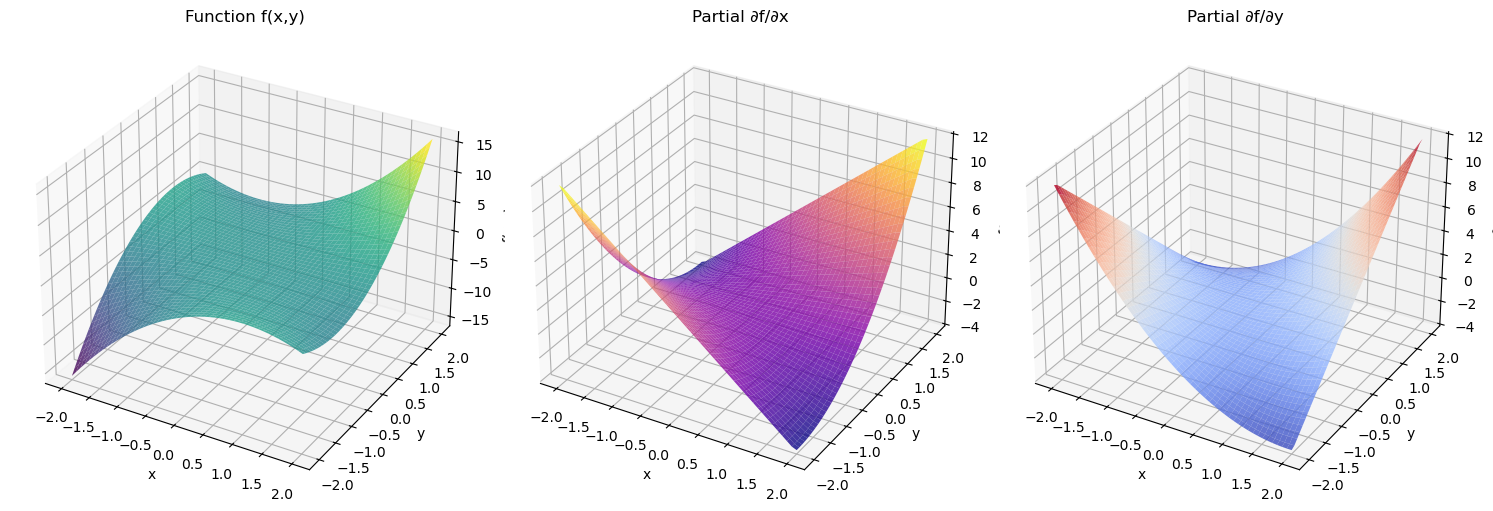


NumPy gradient() computes partial derivatives for multi-dimensional arrays!


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 2D function: f(x,y) = x²y + xy²
def f_2d(x, y):
    return x**2 * y + x * y**2

# Exact partial derivatives
def df_dx_exact(x, y):
    return 2*x*y + y**2

def df_dy_exact(x, y):
    return x**2 + 2*x*y

# Create grid
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)
Z = f_2d(X, Y)

dx = x[1] - x[0]
dy = y[1] - y[0]

# Compute gradients with NumPy
dZ_dy, dZ_dx = np.gradient(Z, dy, dx)  # Note: order is (rows, cols) = (y, x)

# Exact gradients
dZ_dx_exact = df_dx_exact(X, Y)
dZ_dy_exact = df_dy_exact(X, Y)

print("Partial Derivatives of 2D Function")
print(f"Function: f(x,y) = x²y + xy²")
print(f"∂f/∂x = 2xy + y²")
print(f"∂f/∂y = x² + 2xy\n")

# Errors (excluding boundaries)
mask = np.s_[5:-5, 5:-5]
error_x = np.mean(np.abs(dZ_dx[mask] - dZ_dx_exact[mask]))
error_y = np.mean(np.abs(dZ_dy[mask] - dZ_dy_exact[mask]))

print(f"Mean absolute errors:")
print(f"  ∂f/∂x: {error_x:.6f}")
print(f"  ∂f/∂y: {error_y:.6f}")

# Check gradient at specific point
i, j = 25, 25  # center point
x_pt, y_pt = X[i,j], Y[i,j]

print(f"\nAt point ({x_pt:.2f}, {y_pt:.2f}):")
print(f"  ∂f/∂x: numerical={dZ_dx[i,j]:.4f}, exact={dZ_dx_exact[i,j]:.4f}")
print(f"  ∂f/∂y: numerical={dZ_dy[i,j]:.4f}, exact={dZ_dy_exact[i,j]:.4f}")

# Visualize
fig = plt.figure(figsize=(15, 5))

# Original function
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x,y)')
ax1.set_title('Function f(x,y)', fontsize=12)

# Partial x
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X, Y, dZ_dx, cmap='plasma', alpha=0.8)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('∂f/∂x')
ax2.set_title('Partial ∂f/∂x', fontsize=12)

# Partial y
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(X, Y, dZ_dy, cmap='coolwarm', alpha=0.8)
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('∂f/∂y')
ax3.set_title('Partial ∂f/∂y', fontsize=12)

plt.tight_layout()
plt.show()

print("\nNumPy gradient() computes partial derivatives for multi-dimensional arrays!")

## Summary: Finite Difference Methods

### First Derivative Formulas:

| Method | Formula | Accuracy | Use |
|--------|---------|----------|-----|
| Forward | [f(x+h) - f(x)]/h | O(h) | Left boundary |
| Backward | [f(x) - f(x-h)]/h | O(h) | Right boundary |
| Central | [f(x+h) - f(x-h)]/(2h) | O(h²) | Interior points |

### Second Derivative:

\[ f''(x) \approx \frac{f(x+h) - 2f(x) + f(x-h)}{h^2} \quad \text{[O(h²)]} \]

### Key Functions:

```python
# SciPy - adaptive, high accuracy
from scipy.misc import derivative
df = derivative(f, x0, dx=1e-5, n=1, order=3)

# NumPy - discrete data
dy = np.gradient(y, dx)  # uniform spacing
dy = np.gradient(y, x)   # non-uniform spacing
```

### Best Practices:

✓ **Use central difference** when possible (2x more accurate)
✓ **Step size**: h ≈ 10⁻⁵ to 10⁻⁷ usually good for double precision
✓ **Noisy data**: Smooth before differentiating
✓ **Discrete data**: Use `np.gradient()` for convenience
✓ **High accuracy**: Use `scipy.misc.derivative()` with order > 3

### Accuracy vs Stability:

- **Too large h**: Poor approximation (truncation error)
- **Too small h**: Numerical cancellation (roundoff error)
- **Optimal h**: Balance between truncation and roundoff ≈ √ε for O(h²) methods

### Applications:
- Physics: velocity, acceleration, forces
- Engineering: slopes, rates of change
- Image processing: edge detection (gradients)
- Optimization: gradient descent
- Signal processing: rate of change analysis

## Practice Problems

1. **Temperature gradient**: Given temperature T(x) data, compute dT/dx

2. **Curvature**: For curve y(x), compute κ = y''/[1+(y')²]^(3/2)

3. **Jerk**: Given position data, compute jerk j = da/dt = d³x/dt³

4. **Laplacian**: For 2D function f(x,y), compute ∇²f = ∂²f/∂x² + ∂²f/∂y²

5. **Error analysis**: Compare forward, backward, central for different h values